In [1]:
!pip install opendatasets


In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: deep22122003
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


100%|██████████| 2.29G/2.29G [00:20<00:00, 123MB/s] 


In [3]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

In [4]:
# Define training datagen with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # validation_split=0.2
)

# Define test/validation datagen (no augmentation here)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set directory paths
train_images = '/content/chest-xray-pneumonia/chest_xray/chest_xray/train'
test_images = '/content/chest-xray-pneumonia/chest_xray/chest_xray/test'

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_images,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    test_images,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary'
)

print("Training samples:", train_generator.samples)
print("Validation samples:", validation_generator.samples)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Training samples: 5216
Validation samples: 624



Model outputs :

0 : Normal condition

1 : Pneumonia condition

Validation data generator and loading validation data


Plotting : Images with Pneumonia from dataset.

<Figure size 1200x1200 with 0 Axes>

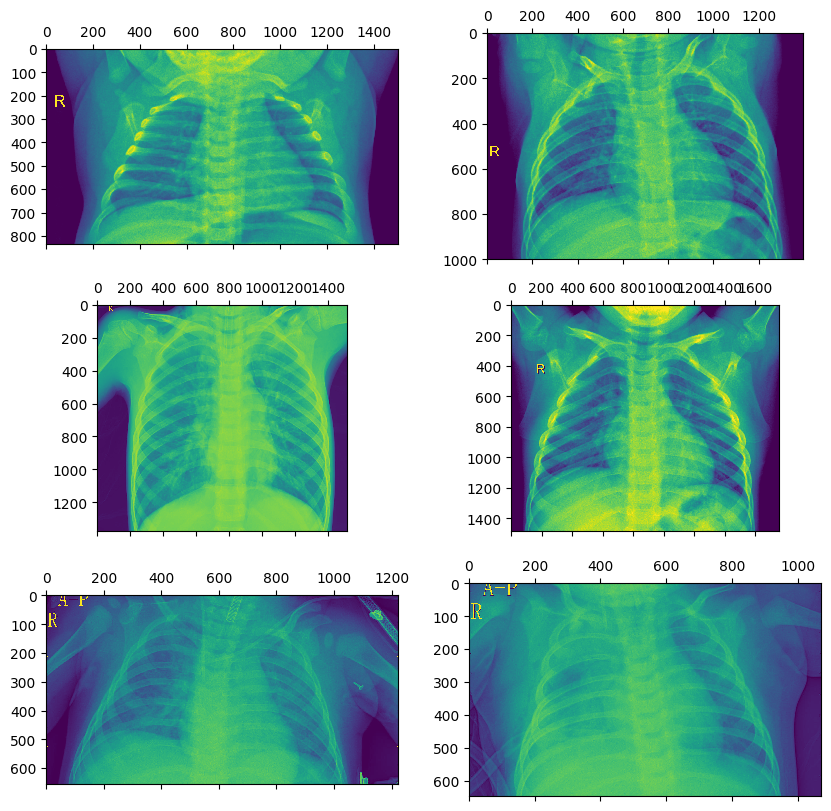

In [5]:
# pneumonia
plot_image=plt.figure(figsize=(12,12))
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[42]))
plot2.matshow(plt.imread(train_generator.filepaths[176]))
plot3.matshow(plt.imread(train_generator.filepaths[1553]))
plot4.matshow(plt.imread(train_generator.filepaths[354]))
plot5.matshow(plt.imread(train_generator.filepaths[2679]))
plot6.matshow(plt.imread(train_generator.filepaths[2710]))

Plotting : Images without Pneumonia from dataset.

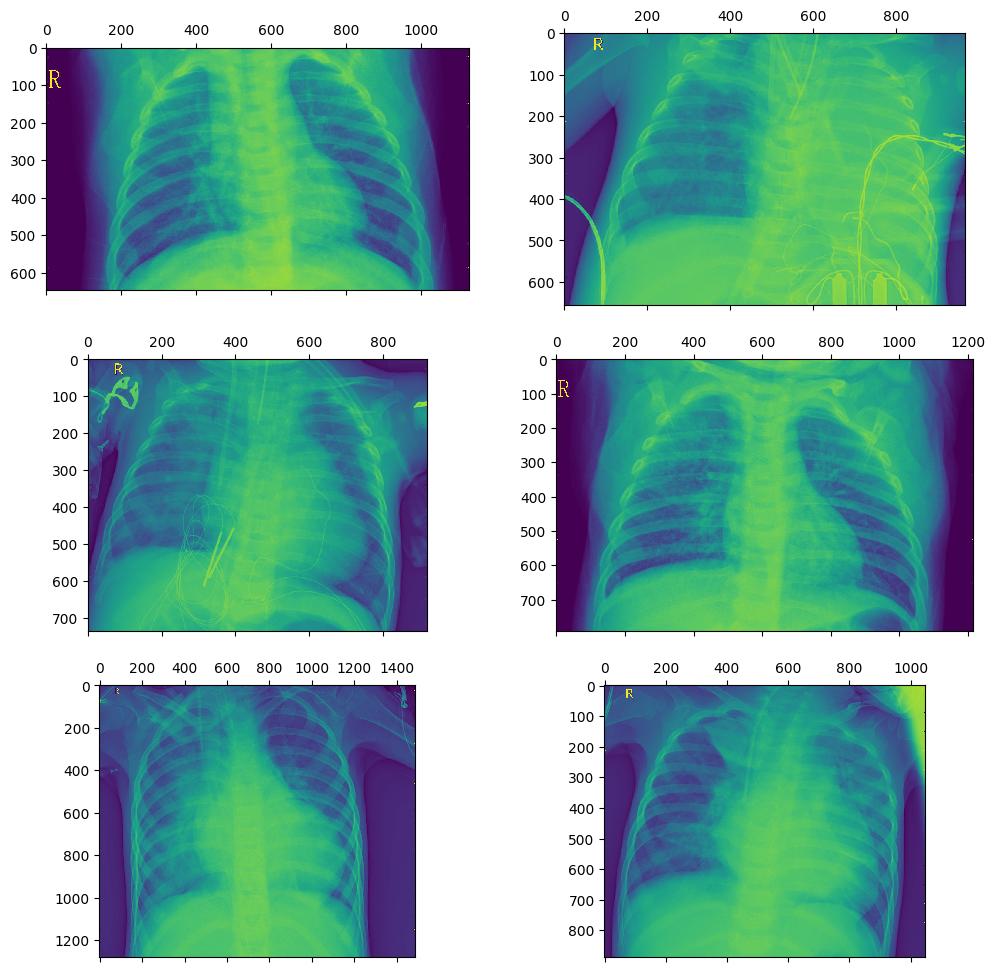

In [6]:
# Normal
plot_image=plt.figure(figsize=(12,12))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[1419]))
plot2.matshow(plt.imread(train_generator.filepaths[1365]))
plot3.matshow(plt.imread(train_generator.filepaths[1400]))
plot4.matshow(plt.imread(train_generator.filepaths[1350]))
plot5.matshow(plt.imread(train_generator.filepaths[1345]))
plot6.matshow(plt.imread(train_generator.filepaths[1349]))

In [7]:
from tensorflow.keras import layers, models,Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import Regularizer
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
import tensorflow as tf
import tensorflow.keras.regularizers as regularizers

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3),
                           kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),  #  Apply dropout *here*

    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),

    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 508,449 (1.94 MB)

 Trainable params: 508,449 (1.94 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
# create earlystop
early_stop=EarlyStopping(
      monitor='val_loss',   # Metric to monitor (can also be 'val_accuracy')
      patience=3,           # Number of epochs with no improvement after which training will be stopped
      restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored quantity
      verbose=1            # Print messages during training
)
history=model.fit(train_generator,epochs=30,callbacks=[early_stop],validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7351 - loss: 1.2238

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 227s 3s/step - accuracy: 0.7352 - loss: 1.2209 - val_accuracy: 0.6250 - val_loss: 0.9487
Epoch 2/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 217s 3s/step - accuracy: 0.7389 - loss: 0.7180 - val_accuracy: 0.6250 - val_loss: 0.7603
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 220s 3s/step - accuracy: 0.7521 - loss: 0.6001 - val_accuracy: 0.8333 - val_loss: 0.4409
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 222s 3s/step - accuracy: 0.8752 - loss: 0.3623 - val_accuracy: 0.8253 - val_loss: 0.5429
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 217s 3s/step - accuracy: 0.9074 - loss: 0.2917 - val_accuracy: 0.8029 - val_loss: 0.5419
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 218s 3s/step - accuracy: 0.9085 - loss: 0.2665 - val_accuracy: 0.8365 - val_loss: 0.4605
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


Plotting a graph of loss and a accuracy

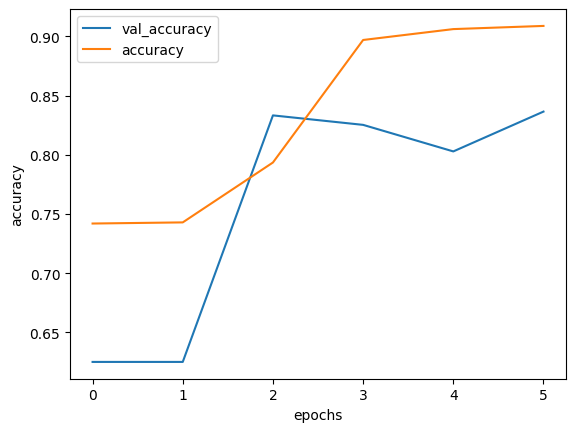

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.plot(history.history['accuracy'],label='accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

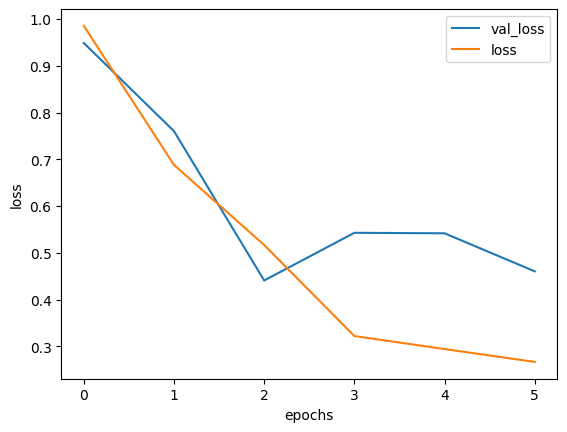

In [17]:
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['loss'],label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [27]:
loss,accuracy=model.evaluate(validation_generator)
print('loss of validation data',loss)
print('accuracy of validation data',accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8298 - loss: 0.4294
loss of validation data 0.4409436583518982
accuracy of validation data 0.8333333134651184


In [29]:
loss,accuracy=model.evaluate(train_generator)
print('loss of training data',loss)
print('accuracy of training data',accuracy)

82/82 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.8764 - loss: 0.3568
loss of training data 0.3580671548843384
accuracy of training data 0.8769171833992004


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction: Normal


Text(0.5, 1.0, 'Prediction: Normal')

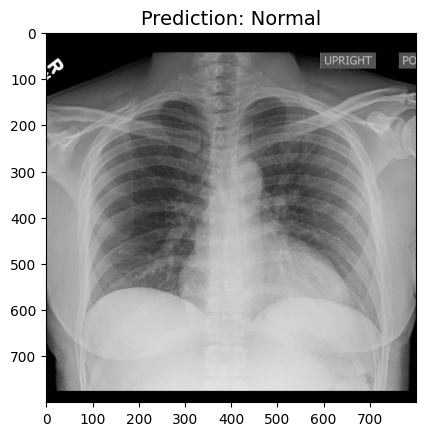

In [30]:
import cv2
img= cv2.imread('/content/normal.jpg')
tempimg = img
img = cv2.resize(img,(150,150)) # Resize to 150x150
img = img/255.0
img = img.reshape(1,150,150,3) # Reshape for prediction
prediction = model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)